# Data Science Project: Financial Inclusion in Africa

Financial inclusion remains a major barrier to economic and human development in Africa.. For instance, in Kenya, Uganda, Rwanda, and Tanzania, only 14% of adults can access or use a commercial bank account, which is considered a great indicator of financial inclusion traditionally. It enables households to save and make payments while helping business build up their creditworthiness and improve their access to loans, insurance, and related services. 

In this project, I will make a machine learning model to predict which individuals are most likely to have or use a bank account in Africa. The model will help indicate the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while offering insights into the key factors influencing individuals’ financial security.

## Data Preprocessing

In this section, I will clean the data and prepare the dataset for efficient analysis and prediction of individuals’ bank account status.

Before diving into the project, I need to set the environment to begin the project. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this project, I used data from "https://drive.google.com/file/d/1XTxaKqg_ULy-RY1o-YMOHT7lIgtHFSPF/view". 
First, I read the csv file as pandas, then extract 5 samples of data to check trends in the data. 

In [2]:
df = pd.read_csv("Train.csv")
df.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
3021,Kenya,2018,uniqueid_3022,No,Urban,Yes,4,20,Female,Child,Single/Never Married,Tertiary education,Self employed
3765,Kenya,2018,uniqueid_3766,No,Rural,Yes,3,31,Male,Head of Household,Married/Living together,Secondary education,Self employed
5639,Kenya,2018,uniqueid_5640,Yes,Rural,Yes,2,28,Female,Child,Single/Never Married,Secondary education,Self employed
13923,Rwanda,2016,uniqueid_7856,No,Rural,Yes,5,17,Male,Child,Single/Never Married,Primary education,Farming and Fishing
21972,Uganda,2018,uniqueid_550,No,Urban,Yes,3,21,Female,Head of Household,Single/Never Married,Primary education,Self employed


Also, this data has 23524 rows with 13 columns. 

In [3]:
df.shape 

(23524, 13)

Before analyzing the data, I'm curious about the difference among the four countries' bank account status, and in general.

In [4]:
df['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [5]:
df.groupby('country')['bank_account'].value_counts()

country   bank_account
Kenya     No              4547
          Yes             1521
Rwanda    No              7732
          Yes             1003
Tanzania  No              6013
          Yes              607
Uganda    No              1920
          Yes              181
Name: count, dtype: int64

Let's start cleaning the dataset. 
The "uniqueid" column is redundant, as all entries begin with "uniqueid_".
I would like to remove the "uniqueid_", then represented by only id numbers.

In [6]:
# Remove uniqueid columns values to only id
df["uniqueid"] = df["uniqueid"].str.replace("uniqueid_", "", regex = False)
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


I also set the index by 'uniqueid' since it looks cleaner than before. 

In [7]:
df = df.set_index('uniqueid')
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
2113,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
2114,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
2115,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income


We also need to determine missing values in the data before making machine learning models to predict. 
As this show, we don't have any missing values in the dataset. 

In [8]:
# Determine missing values
df.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Since the machine learning model can't load categorical values, we need to express categorical variables as numerical variables. Here, I use LabelEncoder() to execute it.

In [9]:
# Encoding 

df1 = df.copy()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include = 'object').columns:
    df1[col] = encoder.fit_transform(df1[col])

df1

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
1,0,2018,1,0,1,3,24,0,5,2,3,9
2,0,2018,0,0,0,5,70,0,1,4,0,4
3,0,2018,1,1,1,5,26,1,3,3,5,9
4,0,2018,0,0,1,5,34,0,1,2,2,3
5,0,2018,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2113,3,2018,0,0,1,4,48,0,1,0,0,7
2114,3,2018,0,0,1,2,27,0,1,3,3,7
2115,3,2018,0,0,1,5,27,0,4,4,2,7


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23524 entries, 1 to 2117
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int64
 1   year                    23524 non-null  int64
 2   bank_account            23524 non-null  int64
 3   location_type           23524 non-null  int64
 4   cellphone_access        23524 non-null  int64
 5   household_size          23524 non-null  int64
 6   age_of_respondent       23524 non-null  int64
 7   gender_of_respondent    23524 non-null  int64
 8   relationship_with_head  23524 non-null  int64
 9   marital_status          23524 non-null  int64
 10  education_level         23524 non-null  int64
 11  job_type                23524 non-null  int64
dtypes: int64(12)
memory usage: 2.3+ MB


The df1 looks clean and doesn't contain any categorical columns. Therefore, we nailed the step 1: Data Preprocessing.

## Exploratory Data Analysis

In this section, I will explore the relationships between variables, identify outliers, and gain insights into the data. 

First, I want to see the correlation between 'bank_account' in the data.

In [11]:
df1.corr()['bank_account'].sort_values(ascending = False)

bank_account              1.000000
education_level           0.323768
cellphone_access          0.209669
gender_of_respondent      0.117234
year                      0.112318
location_type             0.087288
age_of_respondent         0.019429
household_size           -0.028326
marital_status           -0.038739
job_type                 -0.064171
relationship_with_head   -0.070853
country                  -0.161362
Name: bank_account, dtype: float64

This shows that the 'education_level' has the strongest positive correlation with 'bank_account' in the data, while 'age_of_respondent' doesn't affect the 'bank_account'. 

These graphs represent the relationship between 'bank_account'. 

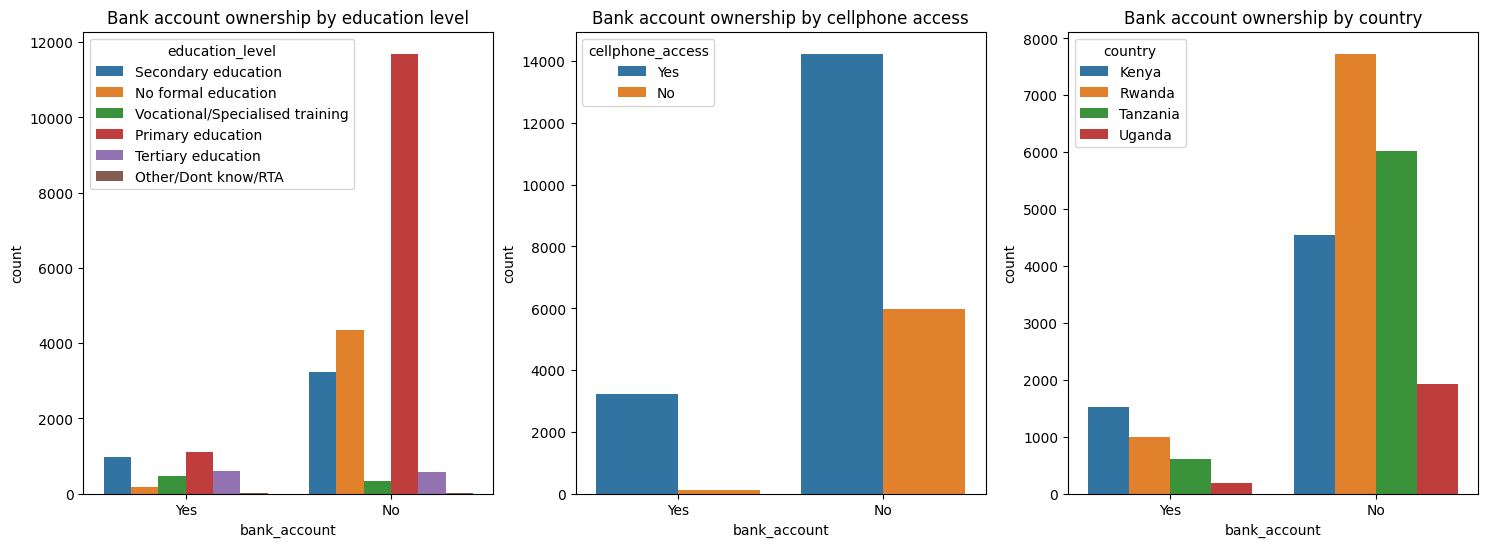

In [12]:
# Count plot of bank account ownership by factors which are high correlations with bank_account
plt.figure(figsize = (18,6))

plt.subplot(1,3,1)
sns.countplot(x = 'bank_account', hue = 'education_level', data = df)
plt.title('Bank account ownership by education level')

plt.subplot(1, 3, 2)
sns.countplot(x = 'bank_account', hue= 'cellphone_access', data =df)
plt.title('Bank account ownership by cellphone access')

plt.subplot(1,3,3)
sns.countplot(x = 'bank_account', hue = 'country', data = df)
plt.title('Bank account ownership by country')
plt.show()

From these graphs, we can gain some insights that when people end their education in primary education, they don't have a bank account. Moreover, people who don't have a cellphone are not able to hold a bank account. 
Interestingly, there is no big difference among countries except Kenya. 

Before moving on to building the machine learning models, I want to explore the relationships between country and year regarding bank account ownership. 

In [13]:
# Identify how many years are in the dataset
df['year'].unique()

array([2018, 2016, 2017])

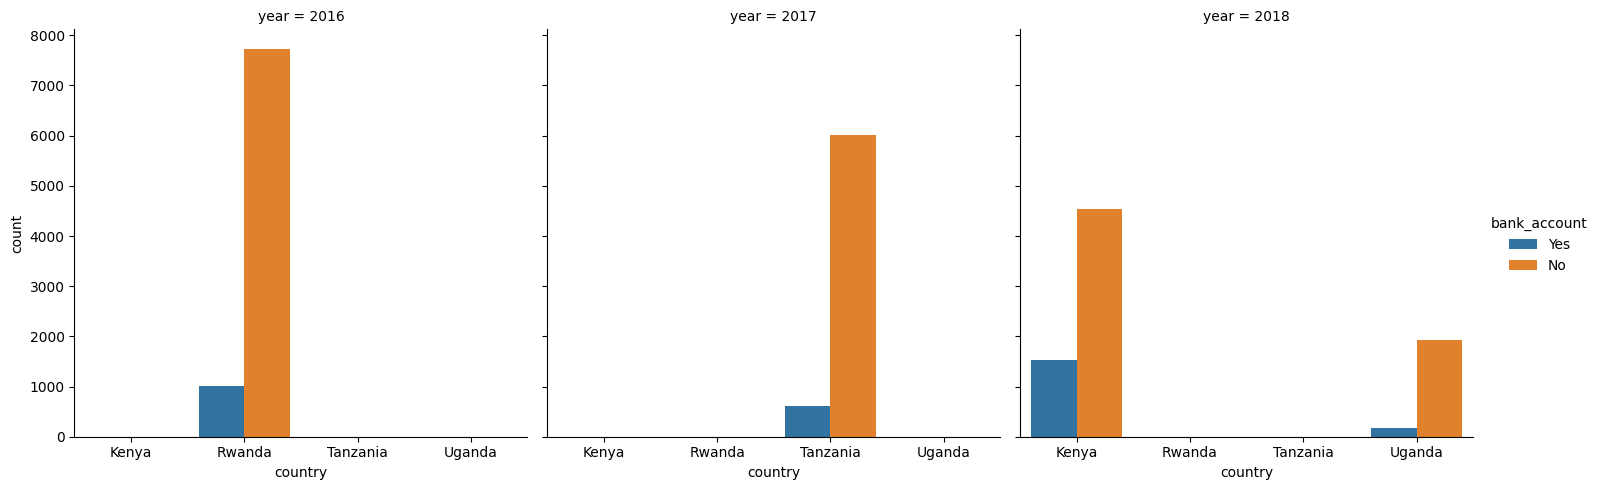

In [14]:
# Make a plot 
sns.catplot(kind = 'count', x = 'country', hue = 'bank_account', col = 'year', data = df)
plt.show()

Notably, each country was surveyed in only one year, suggesting that grouping by country or year could introduce significant bias, since the world changes in the speed of light in this era.

In [15]:
# Confirming the plot is true
df[df['country'] == 'Rwanda'].year.unique()

array([2016])

## Model Building

In this section, I will build some machine learning models to forecast the bank account ownership by data. 
I will explore logistic regression, random forest, and gradient boosting. 

First, I split the data into training and test sets to prepare for model development.

In [16]:
# Split as features and target
X = df1.drop('bank_account',axis =1)
y = df1['bank_account']

# Split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

I began by building a logistic regression model.

In [17]:
# Building the logistic regression model
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Next, we build the random forest classifier. 

In [18]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)
RFmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Lastly, we build a gradient boosting model.

In [19]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

GBmodel = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
GBmodel.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Model Evaluation

In this section, we will evaluate the models we built in the previous section and determine the most accurate model to predict the ownership of a bank account.

In [20]:
# Making predictions for each models
LR_train_predictions = LRmodel.predict(X_train)
LR_test_predictions = LRmodel.predict(X_test)

RF_train_predictions = RFmodel.predict(X_train)
RF_test_predictions = RFmodel.predict(X_test)

GB_train_predictions = GBmodel.predict(X_train)
GB_test_predictions = GBmodel.predict(X_test)

I first evaluated the models using accuracy_score.

In [21]:
# Evaluate the models
from sklearn.metrics import accuracy_score
LR_train_accuracy = accuracy_score(LR_train_predictions, y_train)
LR_test_accuracy = accuracy_score(LR_test_predictions, y_test)

RF_train_accuracy = accuracy_score(RF_train_predictions, y_train)
RF_test_accuracy = accuracy_score(RF_test_predictions, y_test)

GB_train_accuracy = accuracy_score(GB_train_predictions, y_train)
GB_test_accuracy = accuracy_score(GB_test_predictions, y_test)

I also used mean absolute error, mean squared error, and root mean squared error to assess model performance.

In [22]:
# Use mean absolute error, mean squared error, and R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


LR_train_MAE  = mean_absolute_error(y_train, LR_train_predictions)
LR_train_MSQE = mean_squared_error(y_train, LR_train_predictions)
LR_train_RMSE = math.sqrt(LR_train_MSQE)

LR_test_MAE  = mean_absolute_error(y_test, LR_test_predictions)
LR_test_MSQE = mean_squared_error(y_test, LR_test_predictions)
LR_test_RMSE = math.sqrt(LR_test_MSQE)

RF_train_MAE  = mean_absolute_error(y_train, RF_train_predictions)
RF_train_MSQE = mean_squared_error(y_train, RF_train_predictions)
RF_train_RMSE = math.sqrt(RF_train_MSQE)

RF_test_MAE  = mean_absolute_error(y_test, RF_test_predictions)
RF_test_MSQE = mean_squared_error(y_test, RF_test_predictions)
RF_test_RMSE = math.sqrt(RF_test_MSQE)

GB_train_MAE  = mean_absolute_error(y_train, GB_train_predictions)
GB_train_MSQE = mean_squared_error(y_train, GB_train_predictions)
GB_train_RMSE = math.sqrt(GB_train_MSQE)

GB_test_MAE  = mean_absolute_error(y_test, GB_test_predictions)
GB_test_MSQE = mean_squared_error(y_test, GB_test_predictions)
GB_test_RMSE = math.sqrt(GB_test_MSQE)

To see the difference in those evaluations for each model, I make a data frame. 

In [23]:
# Use numpy array to convert evaluations data to tables 
evaluation_array = np.array([[LR_train_accuracy, LR_train_MAE, LR_train_MSQE, LR_train_RMSE],
                             [LR_test_accuracy, LR_test_MAE, LR_test_MSQE, LR_test_RMSE],
                             [RF_train_accuracy, RF_train_MAE, RF_train_MSQE, RF_train_RMSE],
                             [RF_test_accuracy, RF_test_MAE, RF_test_MSQE, RF_test_RMSE],
                             [GB_train_accuracy, GB_train_MAE, GB_train_MSQE, GB_train_RMSE],
                             [GB_test_accuracy, GB_test_MAE, GB_test_MSQE, GB_test_RMSE]])

In [24]:
# Making a table 
evaluation_df = pd.DataFrame(evaluation_array, index = [" Logistic Regression training data", "Logistic Regression test data", "Random Forest training data", "Random Forest test data", 
                                                        "Gradient Boosting training data", "Gradient Boositng test data"],
                             columns = ["Accuracy Score", "Mean absolute", "Mean squared", "R Squared"])
evaluation_df

,Accuracy Score,Mean absolute,Mean squared,R Squared
Logistic Regression training data,0.870946,0.129054,0.129054,0.359241
Logistic Regression test data,0.875460,0.124540,0.124540,0.352902
Random Forest training data,0.866756,0.133244,0.133244,0.365026
Random Forest test data,0.867668,0.132332,0.132332,0.363775
Gradient Boosting training data,0.889955,0.110045,0.110045,0.331730
Gradient Boositng test data,0.889912,0.110088,0.110088,0.331795


This table shows that all models predict really well, with all of their accuracy scores above 0.85. 
Among these models, the random forest classifier showed the highest prediction accuracy.

## Visualization

In this section, I will make some meaningful plots or tables to visualize my prediction through gradient boositng. 

First, let's make heatmaps of predictions by random forest.

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

GB_train_matrix = confusion_matrix(y_train, GB_train_predictions)
GB_test_matrix = confusion_matrix(y_test, GB_test_predictions)

In [26]:
GB_train_df = pd.DataFrame(GB_train_matrix, index=["No", "Yes"], columns=["No", "Yes"])
GB_test_df = pd.DataFrame(GB_test_matrix,  index=["No", "Yes"], columns=["No", "Yes"])

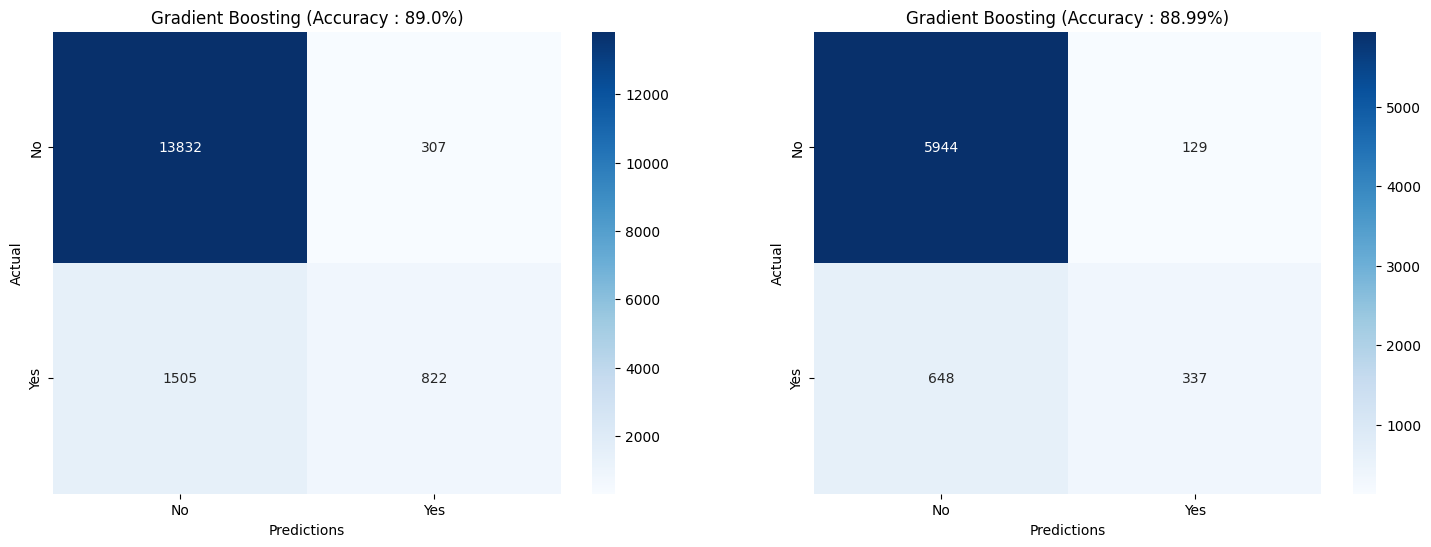

In [27]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.heatmap(GB_train_df, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title(f'Gradient Boosting (Accuracy : {round(GB_train_accuracy * 100, 2)}%)')


plt.subplot(1,2,2)
sns.heatmap(GB_test_df, annot = True, fmt='d', cmap='Blues')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title(f'Gradient Boosting (Accuracy : {round(GB_test_accuracy * 100, 2)}%)')
plt.show()

These two plots show the actual bank account on the y-axis and predictions through a random forest classifier on the x-axis. 
There is little difference between the random forest classifier’s predictions on the training and test datasets, which indicates that there is less possibility of overfitting or biases in these prediction models. 

## Conclusion

For the last section, let's make a dataframe which contains the 'uniqueid' as index, then the actual and predicted of bank account statements. 

In [28]:
y_test_yes_no = ['Yes' if val == 1 else 'No' for val in y_test]
GBpredictions = ['Yes' if val == 1 else 'No' for val in GB_test_predictions]
results = pd.DataFrame({'Actual': y_test_yes_no,
                        'Predicted': GBpredictions}, index = y_test.index)
results

,Actual,Predicted
uniqueid,,
625,No,No
1561,No,No
4806,No,No
4902,No,No
980,No,No
...,...,...
3195,No,No
5934,No,Yes
5727,No,No


As shown, most predicted outcomes closely align with the actual results, which shows my machine learning models' accuracy.

This project aimed to address the challenge of financial inclusion in Africa by building machine learning models that predict whether individuals are likely to own or use a bank account.

Throughout the project, I found that education level, cellphone access, and country of residence were the most influential features affecting an individual's likelihood of having a bank account. Notably, individuals with only primary education or without access to a cellphone were significantly less likely to own a bank account. Additionally, although countries were only surveyed once each during different years, Kenya showed a relatively higher rate of bank account ownership compared to the others.

Among the three classification models I tested, all performed with relatively high accuracy (above 85%). However, the Random Forest classifier slightly outperformed the others, achieving a balance between training and test accuracy, which indicates a low risk of overfitting. This made it a strong candidate for practical application in predicting financial inclusion status.

The insights gained from this project can be valuable for policymakers, financial institutions, and NGOs aiming to improve economic inclusion. For instance, targeting educational initiatives and improving mobile infrastructure could increase financial access in underserved areas. The ability to predict which individuals are less likely to be financially included also enables the development of more personalized outreach programs and financial literacy campaigns.